Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier 

Importing Data

In [2]:
 drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/train.csv")

In [4]:
df_test=pd.read_csv("/content/gdrive/MyDrive/test.csv")

Data analysis

In [5]:
df.shape

(4500, 514)

In [6]:
df.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,-1.36048,-1.31529,0.36119,-0.62857,-1.65290,1.47167,-0.88741,-0.25942,-0.34414,-0.38914,0.38425,-0.50553,-0.09451,0.30568,-1.07570,-0.65924,1.10918,1.22234,-0.12479,0.50198,-0.63932,0.61505,1.16747,0.36921,-0.44398,0.46192,-0.83207,-0.74952,-0.40722,...,0.54072,-0.71995,1.11262,-0.11429,0.85618,0.17233,-1.06815,0.04569,-0.13031,2.07549,0.47934,0.69172,1.37139,0.45480,-0.96053,0.06319,0.09664,-0.34749,0.09889,-0.87606,0.82594,0.52841,0.84209,0.16771,0.59003,-0.22960,-0.04017,0.15554,-0.41569,0.68050,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,-0.56431,0.42060,-0.47533,1.60025,-0.02106,-2.30193,-0.31614,-0.08050,0.85041,-0.10574,-0.33177,-1.32102,-0.22244,-0.52076,0.40012,-0.41339,-0.15176,1.02155,-0.52834,0.66718,0.54844,0.18323,0.28764,-0.80084,-0.85040,0.45097,0.88317,-1.13375,-1.85301,...,-0.25966,-1.19259,-0.71514,-0.08903,-0.58853,-0.20697,-0.77025,-1.21129,-0.67575,0.32509,-0.35147,-0.33581,-0.31505,-1.66721,0.40666,0.15053,-0.77809,0.35837,-1.10950,0.03764,-0.93728,-0.68952,-0.92334,-0.35401,-1.20552,1.10199,0.46268,0.85954,-0.48484,-0.54585,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,0.67435,-1.27604,-1.37050,-0.91682,0.23617,0.53676,-0.26815,-0.66989,0.46076,-0.04117,1.34078,0.46545,-0.25943,-0.22918,-0.49346,-0.53558,0.69776,1.15477,0.01293,-0.86763,-0.08987,0.54660,0.09142,-0.21663,-0.28233,0.15426,-1.02164,-0.24342,-0.18844,...,0.91472,-0.29778,0.45507,0.03296,-0.79752,1.19759,-0.45417,0.15993,0.39516,-0.87621,0.05737,-0.99432,1.19910,0.78989,-0.13908,0.12384,0.38121,0.05699,-0.89445,-0.67448,-0.07669,-1.50409,0.07962,0.95116,0.72782,-0.88516,0.40735,0.10415,0.31639,-0.34801,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,0.97349,-0.21032,-0.71143,0.59725,-0.51849,0.00126,1.22219,0.57160,0.41212,0.90077,-0.80797,-1.20564,1.40774,0.49080,-1.05429,0.26300,-0.03849,-0.66792,-0.29260,0.47713,0.44967,0.44411,-0.13465,-0.20365,0.52841,-0.47348,0.39295,0.67695,0.40861,...,0.65551,-0.17916,0.55700,1.84589,0.70722,-0.55871,-1.18265,0.82509,-0.50715,0.71948,-1.08462,-0.05607,0.86918,-0.11338,-0.73700,-0.12130,0.81417,-0.61391,-0.90671,1.09301,0.37716,1.06373,-0.62199,-0.21279,-0.43245,-0.28904,-0.25435,-0.20458,-0.00398,1.18449,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,0.13601,0.26917,0.11973,0.04378,1.06879,0.10060,-0.83331,-0.64776,0.26461,0.65249,-0.41807,0.65920,0.11838,-0.00525,-0.74657,-0.97743,-0.71398,-0.08356,-0.82942,0.60474,0.12790,-0.41187,-2.18319,0.27367,0.54507,0.26555,0.67382,-0.24832,0.43397,...,0.90449,-0.51652,-0.11353,1.59131,-0.15053,-0.03551,0.02906,0.16957,0.62629,0.71465,-0.77525,0.46366,0.03279,-0.17744,0.32256,0.16237,-0.52918,-1.07961,0.55594,0.07770,0.08003,0.86164,0.24552,-0.17842,0.57825,0.01275,-1.05442,-0.61130,0.72826,-1.61306,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


In [7]:
df=df.iloc[:,1:]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 513 entries, v1 to glasses
dtypes: float64(512), int64(1)
memory usage: 17.6 MB


In [9]:
df.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.029433,-0.072952,-0.063137,-0.027426,0.009050,-0.032587,0.005451,-0.101231,-0.134099,0.067560,-0.002083,0.078040,-0.024938,-0.029395,0.027814,-0.050992,0.121394,0.106751,0.001935,0.047460,-0.018330,-0.058942,0.055872,-0.083219,-0.023057,0.045138,0.080400,-0.032720,0.037929,0.016872,0.175460,0.086574,-0.088680,-0.054209,-0.019898,0.085469,-0.146745,-0.000734,-0.163095,-0.087749,...,0.013406,0.087366,-0.048248,-0.077322,-0.049410,0.018462,-0.036421,0.053984,-0.128585,-0.037571,-0.038897,0.082227,-0.075013,-0.074086,0.044075,0.009034,-0.207801,0.119168,-0.002119,0.023028,-0.082201,-0.060344,-0.088316,0.023726,0.088277,0.025180,-0.027934,0.067269,-0.020810,-0.115068,-0.091886,0.057622,-0.063235,-0.081697,-0.032337,-0.084307,-0.032826,0.096038,-0.064696,0.634667
std,0.769812,0.740963,0.746607,0.744712,0.775853,0.770992,0.761690,0.748796,0.746005,0.747827,0.714939,0.706872,0.663820,0.812123,0.755075,0.751805,0.772157,0.723660,0.758057,0.767998,0.712469,0.770689,0.754416,0.761771,0.773681,0.764593,0.735932,0.751691,0.776739,0.743376,0.767899,0.815652,0.763232,0.731656,0.746060,0.718874,0.770070,0.780750,0.745571,0.782649,...,0.695161,0.696326,0.770055,0.681999,0.755388,0.738660,0.758322,0.713244,0.762161,0.752204,0.745001,0.753694,0.729876,0.771973,0.752416,0.766827,0.738646,0.724609,0.774068,0.750480,0.746982,0.809670,0.735013,0.692339,0.820121,0.757211,0.757624,0.748709,0.755673,0.735968,0.735644,0.739561,0.731691,0.761166,0.738119,0.743303,0.756891,0.737970,0.830538,0.481577
min,-2.895330,-2.381940,-2.599930,-2.748930,-2.291530,-4.020940,-2.736720,-2.872970,-2.397950,-2.768610,-3.220590,-2.342850,-3.063600,-2.655160,-2.394360,-2.711950,-3.070490,-2.352870,-2.819900,-2.521800,-2.366830,-3.290500,-2.332010,-2.569310,-2.460720,-2.406860,-2.527720,-2.841720,-2.551610,-2.209130,-3.108830,-2.674820,-3.121610,-3.072380,-2.545570,-2.077640,-3.127940,-2.741990,-2.663210,-3.387590,...,-2.409010,-2.726200,-2.931060,-2.221200,-2.210510,-2.548280,-2.654120,-2.666030,-2.746630,-2.810960,-3.180610,-2.232400,-2.435070,-3.109640,-2.594380,-2.391540,-2.737760,-2.293100,-2.493990,-2.443920,-2.523910,-3.252070,-2.860860,-2.447960,-2.610140,-2.591580,-2.418330,-2.469600,-2.350780,-2.586140,-2.788230,-2.624400,-2.806240,-2.907480,-3.136690,-2.490630,-2.510730,-2.626380,-2.906970,0.000000
25%,-0.489807,-0.568788,-0.575425,-0.548003,-0.541330,-0.550515,-0.516868,-0.582322,-0.658523,-0.455873,-0.501383,-0.369287,-0.458875,-0.574332,-0.507650,-0.573000,-0.408225,-0.340958,-0.458318,-0.479683,-0.532473,-0.578270,-0.474053,-0.608855,-0.556867,-0.519232,-0.421403,-0.543945,-0.482272,-0.518310,-0.352270,-0.421890,-0.608073,-0.528593,-0.550990,-0.4018

Text(6.799999999999997, 0.5, 'glasses')

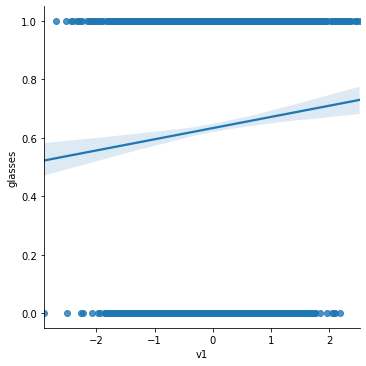

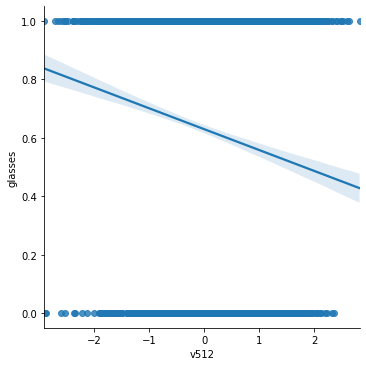

In [10]:
sns.lmplot(x='v1',y='glasses',data=df)
plt.xlabel('v1')
plt.ylabel('glasses')
sns.lmplot(x='v512',y='glasses',data=df)
plt.xlabel('v512')
plt.ylabel('glasses')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


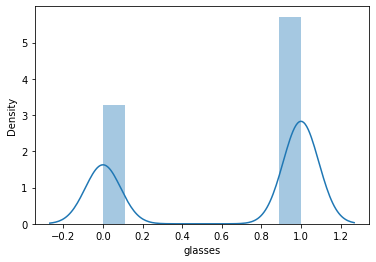

In [11]:
sns.distplot(df.glasses)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


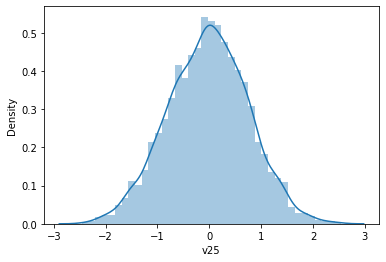

In [12]:
sns.distplot(df.v25)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


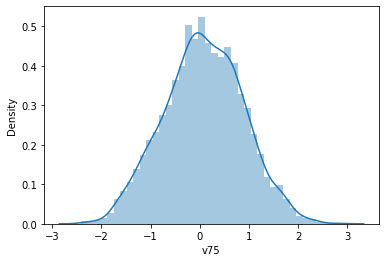

In [13]:
sns.distplot(df.v75)

Data Splitting

In [14]:
x= df.iloc[:,:-1]
x

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,...,v473,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512
0,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,-1.36048,-1.31529,0.36119,-0.62857,-1.65290,1.47167,-0.88741,-0.25942,-0.34414,-0.38914,0.38425,-0.50553,-0.09451,0.30568,-1.07570,-0.65924,1.10918,1.22234,-0.12479,0.50198,-0.63932,0.61505,1.16747,0.36921,-0.44398,0.46192,-0.83207,-0.74952,-0.40722,0.47676,...,-0.39096,0.54072,-0.71995,1.11262,-0.11429,0.85618,0.17233,-1.06815,0.04569,-0.13031,2.07549,0.47934,0.69172,1.37139,0.45480,-0.96053,0.06319,0.09664,-0.34749,0.09889,-0.87606,0.82594,0.52841,0.84209,0.16771,0.59003,-0.22960,-0.04017,0.15554,-0.41569,0.68050,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609
1,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,-0.56431,0.42060,-0.47533,1.60025,-0.02106,-2.30193,-0.31614,-0.08050,0.85041,-0.10574,-0.33177,-1.32102,-0.22244,-0.52076,0.40012,-0.41339,-0.15176,1.02155,-0.52834,0.66718,0.54844,0.18323,0.28764,-0.80084,-0.85040,0.45097,0.88317,-1.13375,-1.85301,-0.36710,...,-1.33041,-0.25966,-1.19259,-0.71514,-0.08903,-0.58853,-0.20697,-0.77025,-1.21129,-0.67575,0.32509,-0.35147,-0.33581,-0.31505,-1.66721,0.40666,0.15053,-0.77809,0.35837,-1.10950,0.03764,-0.93728,-0.68952,-0.92334,-0.35401,-1.20552,1.10199,0.46268,0.85954,-0.48484,-0.54585,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496
2,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,0.67435,-1.27604,-1.37050,-0.91682,0.23617,0.53676,-0.26815,-0.66989,0.46076,-0.04117,1.34078,0.46545,-0.25943,-0.22918,-0.49346,-0.53558,0.69776,1.15477,0.01293,-0.86763,-0.08987,0.54660,0.09142,-0.21663,-0.28233,0.15426,-1.02164,-0.24342,-0.18844,-0.64555,...,-0.65124,0.91472,-0.29778,0.45507,0.03296,-0.79752,1.19759,-0.45417,0.15993,0.39516,-0.87621,0.05737,-0.99432,1.19910,0.78989,-0.13908,0.12384,0.38121,0.05699,-0.89445,-0.67448,-0.07669,-1.50409,0.07962,0.95116,0.72782,-0.88516,0.40735,0.10415,0.31639,-0.34801,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982
3,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,0.97349,-0.21032,-0.71143,0.59725,-0.51849,0.00126,1.22219,0.57160,0.41212,0.90077,-0.80797,-1.20564,1.40774,0.49080,-1.05429,0.26300,-0.03849,-0.66792,-0.29260,0.47713,0.44967,0.44411,-0.13465,-0.20365,0.52841,-0.47348,0.39295,0.67695,0.40861,-0.27174,...,-0.64236,0.65551,-0.17916,0.55700,1.84589,0.70722,-0.55871,-1.18265,0.82509,-0.50715,0.71948,-1.08462,-0.05607,0.86918,-0.11338,-0.73700,-0.12130,0.81417,-0.61391,-0.90671,1.09301,0.37716,1.06373,-0.62199,-0.21279,-0.43245,-0.28904,-0.25435,-0.20458,-0.00398,1.18449,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755
4,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,0.13601,0.26917,0.11973,0.04378,1.06879,0.10060,-0.83331,-0.64776,0.26461,0.65249,-0.41807,0.65920,0.11838,-0.00525,-0.74657,-0.97743,-0.71398,-0.08356,-0.82942,0.60474,0.12790,-0.41187,-2.18319,0.27367,0.54507,0.26555,0.67382,-0.24832,0.43397,0.50747,...,1.08390,0.90449,-0.51652,-0.11353,1.59131,-0.15053,-0.03551,0.02906,0.16957,0.62629,0.71465,-0.77525,0.46366,0.03279,-0.17744,0.32256,0.16237,-0.52918,-1.07961,0.55594,0.07770,0.08003,0.86164,0.24552,-0.17842,0.57825,0.01275,-1.05442,-0.61130,0.72826,-1.61306,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [15]:
y=df.iloc[:,-1]
y

0       0
1       1
2       1
3       0
4       0
       ..
4495    0
4496    0
4497    1
4498    1
4499    0
Name: glasses, Length: 4500, dtype: int64

features and class Visualisation

In [16]:
x.corr()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,...,v473,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512
v1,1.000000,-0.002023,0.038853,-0.094311,-0.017213,-0.030966,-0.021780,0.074147,0.042498,-0.051538,-0.053732,0.028264,-0.061249,0.092559,-0.007675,0.030563,-0.084676,0.024319,0.039792,0.057275,-0.033388,0.013504,-0.013844,-0.004062,-0.058511,-0.015210,0.015017,0.060999,0.067424,0.054880,0.001614,0.062482,-0.064381,-0.030171,-0.092070,-0.003760,-0.033136,0.082490,-0.075561,-0.016749,...,-0.036636,-0.049884,0.009072,-0.047971,0.099240,0.050611,-0.020465,-0.042700,0.066230,0.062505,0.098477,0.056215,-0.022425,-0.010289,-0.065679,-0.017013,-0.069337,0.049625,-0.000146,0.028859,-0.033765,-0.024855,-0.039981,0.121632,0.094019,0.028013,-0.046761,0.008447,0.097570,-0.028233,-0.068844,0.035670,-0.041801,-0.072450,-0.090454,0.011260,-0.003808,0.033349,-0.056485,-0.039899
v2,-0.002023,1.000000,0.102281,-0.066199,-0.045020,-0.126731,-0.017119,0.005107,-0.010590,0.000576,-0.066252,-0.052578,0.004483,0.038211,0.062228,-0.040487,0.015248,0.037498,0.000259,0.027014,-0.065840,0.096061,-0.064186,0.012157,0.006011,0.023161,0.092200,-0.125486,-0.072283,-0.101518,0.046429,0.058720,-0.006731,0.038877,0.002893,-0.087542,0.007727,-0.085660,0.064870,0.000980,...,-0.016888,0.078440,0.106401,0.065363,0.003558,-0.037596,0.027438,0.009486,0.090962,-0.013106,-0.025440,0.088297,0.097025,-0.010813,0.078968,-0.135279,-0.005574,0.003527,-0.072617,0.041403,0.044609,0.121311,0.028647,0.002063,0.064988,-0.056847,-0.066102,0.102364,0.028785,0.102779,0.122050,0.027770,-0.047446,0.026986,0.059907,0.014082,-0.010682,-0.072824,-0.014253,0.044633
v3,0.038853,0.102281,1.000000,-0.002259,0.042269,-0.042258,0.027575,-0.039317,-0.018468,0.061344,-0.048270,-0.057431,-0.009537,0.051474,0.034826,-0.180503,-0.028195,-0.010000,-0.097245,0.058237,0.041098,0.056646,0.051710,0.073948,0.033764,0.053159,-0.066510,-0.037239,0.078155,-0.060878,0.005933,-0.053192,-0.054221,0.031730,0.046891,-0.038609,0.046318,0.004848,0.067738,-0.003741,...,0.094543,-0.015883,0.092658,0.041912,0.115282,0.022207,-0.012188,0.096893,0.062614,-0.021925,0.010066,0.080001,0.110309,-0.106153,0.049941,-0.124584,0.026452,0.042935,0.074813,0.103057,0.045816,0.052361,0.018591,-0.001712,0.067532,-0.034477,0.038194,-0.028966,0.040545,-0.000866,0.005674,0.035577,-0.031420,-0.099403,0.037249,-0.011012,-0.021491,-0.035097,-0.016781,0.172592
v4,-0.094311,-0.066199,-0.002259,1.000000,-0.062721,0.084357,0.059756,0.008754,0.026371,0.076558,-0.043119,-0.021635,-0.048496,0.076913,0.019023,-0.043708,0.015616,0.075083,-0.001627,-0.031727,-0.022143,-0.067371,0.019801,0.029317,0.037138,0.133788,-0.120187,-0.122012,0.042001,0.032112,-0.064768,-0.061465,0.086821,0.058941,0.042201,0.053570,0.058982,0.035903,0.087380,-0.080084,...,0.067480,0.050494,0.015502,-0.017450,0.038318,-0.011984,0.087157,0.024929,0.068262,0.116654,0.005065,0.045071,-0.097506,0.006965,-0.066821,-0.016193,0.045740,-0.046783,0.036712,0.089446,-0.004556,-0.011620,-0.008537,-0.003235,0.011613,-0.004965,0.036496,-0.060669,-0.110326,0.018158,-0.062247,-0.019235,-0.056958,0.034453,0.031210,-0.019021,-0.067960,0.043764,-0.012542,-0.016844
v5,-0.017213,-0.045020,0.042269,-0.062721,1.000000,-0.031327,-0.072083,0.057719,0.039790,0.023083,0.102057,0.006805,-0.070790,-0.039031,0.036223,-0.002692,0.118902,-0.010148,0.070815,-0.027245,-0.046553,0.020631,0.047484,0.092769,-0.062500,-0.017411,0.000117,0.053375,-0.031592,0.041191,0.040025,0.030320,-0.025062,0.055748,0.117452,0.076780,0.014911,0.020613,-0.026699,0.013499,...,-0.035800,0.028089,0.044918,-0.044126,0.096048,0.056210,0.048716,-0.062523,-0.029344,-0.070347,0.085193,0.027423,0.039853,-0.005526,0.117085,-0.032597,0.021277,0.040204,0.002225,-0.000225,-0.076424,-0.021547

In [17]:
y.unique()
y_sum=y.groupby(y).size()
y_sum

glasses
0    1644
1    2856
Name: glasses, dtype: int64

Text(0, 0.5, 'Count')

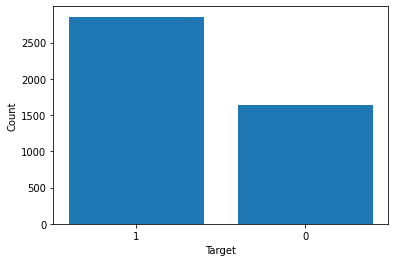

In [18]:
t1 = len(df[df.glasses == 1])
t0 = len(df[df.glasses == 0])
count = [t1, t0]
label = ["1", "0"]
plt.bar(label, count)
plt.xlabel("Target")
plt.ylabel("Count")

In [19]:
c_matrix=np.cov(x.T)
c_matrix

array([[ 0.5926103 , -0.00115412,  0.02233092, ...,  0.01943128,
        -0.03208923, -0.02550949],
       [-0.00115412,  0.54902597,  0.05658277, ..., -0.04084174,
        -0.00779356,  0.02746713],
       [ 0.02233092,  0.05658277,  0.55742253, ..., -0.01983318,
        -0.00924566,  0.10702172],
       ...,
       [ 0.01943128, -0.04084174, -0.01983318, ...,  0.572884  ,
         0.00420051, -0.03168719],
       [-0.03208923, -0.00779356, -0.00924566, ...,  0.00420051,
         0.54460009,  0.03618324],
       [-0.02550949,  0.02746713,  0.10702172, ..., -0.03168719,
         0.03618324,  0.68979256]])

* **bold text**Models* fitted with original data set

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=16)

In [21]:
model0n=DecisionTreeClassifier()
model0n.fit(x_train,y_train)
model0n.score(x_test,y_test)

0.8111111111111111

In [22]:
model1n=RandomForestClassifier()
model1n.fit(x_train,y_train)
model1n.score(x_test,y_test)

0.98

In [23]:
model2n=SVC()
model2n.fit(x_train,y_train)
model2n.score(x_test,y_test)

1.0

In [24]:
model3n=MLPClassifier(activation='relu',max_iter=500,random_state=16,beta_1=0.9,beta_2=0.999,learning_rate='constant',learning_rate_init=0.001)
model3n.fit(x_train,y_train)
model3n.score(x_test,y_test)

1.0



After scaling Data

In [25]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x)
x_new=scale.transform(x)

In [26]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_new,y,test_size=0.2,random_state=16)

In [27]:
model0s=DecisionTreeClassifier()
model0s.fit(x_train,y_train)
model0s.score(x_test,y_test)

0.7844444444444445

In [28]:
model1s=RandomForestClassifier()
model1s.fit(x_train,y_train)
model1s.score(x_test,y_test)

0.9788888888888889

In [29]:
model2s=SVC()
model2s.fit(x_train,y_train)
model2s.score(x_test,y_test)

1.0

In [30]:
model3s=MLPClassifier(activation='relu',max_iter=500,random_state=16,beta_1=0.9,beta_2=0.999,learning_rate='constant',learning_rate_init=0.001)
model3s.fit(x_train,y_train)
model3s.score(x_test,y_test)

1.0

*PCA*(Dimesionality reduction)

In [31]:
pca=PCA(n_components=.9
         ,random_state=2)
pca.fit(x_new)
var_f1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var_f1

array([ 1.2,  2.4,  3.5,  4.6,  5.7,  6.8,  7.8,  8.8,  9.8, 10.8, 11.8,
       12.8, 13.7, 14.6, 15.5, 16.4, 17.3, 18.2, 19.1, 20. , 20.8, 21.6,
       22.4, 23.2, 24. , 24.8, 25.6, 26.4, 27.2, 28. , 28.8, 29.5, 30.2,
       30.9, 31.6, 32.3, 33. , 33.7, 34.4, 35.1, 35.8, 36.5, 37.1, 37.7,
       38.3, 38.9, 39.5, 40.1, 40.7, 41.3, 41.9, 42.5, 43.1, 43.7, 44.3,
       44.9, 45.4, 45.9, 46.4, 46.9, 47.4, 47.9, 48.4, 48.9, 49.4, 49.9,
       50.4, 50.9, 51.4, 51.9, 52.4, 52.8, 53.2, 53.6, 54. , 54.4, 54.8,
       55.2, 55.6, 56. , 56.4, 56.8, 57.2, 57.6, 58. , 58.4, 58.8, 59.2,
       59.6, 60. , 60.4, 60.8, 61.1, 61.4, 61.7, 62. , 62.3, 62.6, 62.9,
       63.2, 63.5, 63.8, 64.1, 64.4, 64.7, 65. , 65.3, 65.6, 65.9, 66.2,
       66.5, 66.8, 67.1, 67.3, 67.5, 67.7, 67.9, 68.1, 68.3, 68.5, 68.7,
       68.9, 69.1, 69.3, 69.5, 69.7, 69.9, 70.1, 70.3, 70.5, 70.7, 70.9,
       71.1, 71.3, 71.5, 71.7, 71.9, 72.1, 72.3, 72.5, 72.7, 72.9, 73.1,
       73.3, 73.5, 73.7, 73.9, 74.1, 74.3, 74.5, 74

In [32]:
x_pca2=pca.transform(x_new)

In [33]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_pca2,y,test_size=0.2,random_state=16)

In [34]:
model0p=DecisionTreeClassifier()
model0p.fit(x_train,y_train)
model0p.score(x_test,y_test)

0.7977777777777778

In [35]:
model1p=RandomForestClassifier()
model1p.fit(x_train,y_train)
model1p.score(x_test,y_test)

0.9677777777777777

In [36]:
model2p=SVC()
model2p.fit(x_train,y_train)
model2p.score(x_test,y_test)

1.0

In [37]:
model3p=MLPClassifier(activation='relu',max_iter=500,random_state=16,beta_1=0.9,beta_2=0.999,learning_rate='constant',learning_rate_init=0.001)
model3p.fit(x_train,y_train)
model3p.score(x_test,y_test)

1.0

5-fold Cross Validation on all 4 models boh before and after PCA

In [38]:
from sklearn.model_selection import cross_validate

In [39]:
arr=[]
arr.append(model0n)
arr.append(model1n)
arr.append(model2n)
arr.append(model3n)
arr.append(model0s)
arr.append(model1s)
arr.append(model2s)
arr.append(model3s)
arr.append(model0p)
arr.append(model1p)
arr.append(model2p)
arr.append(model3p)

In [43]:
c01=cross_validate(model0n,x,y)
c01

{'fit_time': array([3.0201571 , 2.99390078, 2.94601297, 2.89084291, 2.86000633]),
 'score_time': array([0.00341153, 0.00320077, 0.00310731, 0.00321913, 0.00321293]),
 'test_score': array([0.78111111, 0.77888889, 0.77111111, 0.78      , 0.79      ])}

In [44]:
c11=cross_validate(model1n,x,y)
c11

{'fit_time': array([7.64887524, 7.53525925, 7.57048512, 7.49972558, 7.53442097]),
 'score_time': array([0.03369808, 0.03345561, 0.03242588, 0.03322005, 0.0327034 ]),
 'test_score': array([0.96      , 0.96222222, 0.98222222, 0.97111111, 0.96666667])}

In [45]:
c21=cross_validate(model2n,x,y)
c21

{'fit_time': array([9.3994782 , 9.32868433, 9.48027253, 9.49458456, 9.40334249]),
 'score_time': array([1.58955884, 1.55109429, 1.60731149, 1.56942225, 1.56311059]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [46]:
c31=cross_validate(model3n,x,y)
c31

{'fit_time': array([3.49207115, 3.52537823, 3.62008405, 3.56690145, 3.48447156]),
 'score_time': array([0.0079596 , 0.00837207, 0.00813246, 0.00855231, 0.0078516 ]),
 'test_score': array([0.99444444, 0.99777778, 0.99222222, 0.99111111, 0.99      ])}

In [47]:
c02=cross_validate(model0p,x_pca2,y)
c02

{'fit_time': array([1.32865524, 1.19483757, 1.27866554, 1.27172589, 1.27438307]),
 'score_time': array([0.00155449, 0.00146532, 0.00165772, 0.00155044, 0.00158834]),
 'test_score': array([0.95111111, 0.96888889, 0.96111111, 0.96111111, 0.93888889])}

In [48]:
c12=cross_validate(model1p,x_pca2,y)
c12

{'fit_time': array([6.33886623, 6.26859665, 6.15645528, 6.30513239, 6.14751959]),
 'score_time': array([0.02240682, 0.02285743, 0.02163792, 0.02387476, 0.02218699]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [49]:
c22=cross_validate(model2p,x_pca2,y)
c22

{'fit_time': array([3.00161982, 2.98366427, 2.99406314, 3.04605317, 2.9718082 ]),
 'score_time': array([0.66936064, 0.64736867, 0.64986396, 0.65700102, 0.64434075]),
 'test_score': array([0.99777778, 0.99888889, 1.        , 1.        , 0.99888889])}

In [50]:
c32=cross_validate(model3p,x_pca2,y)
c32

{'fit_time': array([2.32069492, 2.37045312, 2.38429046, 2.40028572, 2.34810853]),
 'score_time': array([0.00397658, 0.00407577, 0.00405169, 0.0042069 , 0.0076139 ]),
 'test_score': array([1.        , 0.99888889, 0.99888889, 0.99555556, 0.99777778])}